In [1]:
import os
import csv
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import argparse
import ntpath
import sys
import tensorflow as tf
import numpy as np
import datetime
from prettytable import PrettyTable
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from preprocessing import is_number

In [2]:
path = '/home/wanli/data/Extended_ctr/citeulike_a_extended/paper_info.csv'
null_token = 'NaN'
now = datetime.datetime.now()
    
clean_file_path = path +'.cleaned'


# Month converter
months = ['apr','aug', 'dec','feb', 'jan' ,'jul' ,'jun' ,'mar' ,'may', 'nov', 'oct', 'sep']
month_convert_func = lambda x: x if x in months else null_token

def number_convert_func (x):
    if is_number(x):
        return x
    else:
        print(x)
        return null_token
    
labels = ['doc_id', 'citeulike_id', 'type', 'pages', 'year']
labels_dtype = {'doc_id': np.int32, 'citeulike_id': np.int32, 'type': str, 'pages': np.int32}
convert_func= {'pages': number_convert_func, 'doc_id': number_convert_func,
               'citeulike_id': number_convert_func}
# labels = ['doc_id', 'citeulike_id', 'type', 'journal', 'booktitle', 'series', 'pages', 'year', 'month', 'address']
# labels_dtype = {'doc_id': np.int32, 'citeulike_id': np.int32, 'type': str, 'journal': str, 'booktitle': str,
#                 'series': str,
#                 'pages': np.int32, 'month': str, 'address': str}
# convert_func = {'month': month_convert_func, 'pages': number_convert_func, 'doc_id': number_convert_func,
#                 'citeulike_id': number_convert_func}

df = pd.read_table(clean_file_path, delimiter='\t', index_col = 'doc_id', usecols=labels,dtype=labels_dtype,
                     na_values='\\N',na_filter=False,
                     converters=convert_func)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: ParserWarning: Both a converter and dtype were specified for column doc_id - only the converter will be used
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: ParserWarning: Both a converter and dtype were specified for column citeulike_id - only the converter will be used
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: ParserWarning: Both a converter and dtype were specified for column pages - only the converter will be used


In [3]:
print(df.shape)
# count of unique values:
print (df.apply(pd.Series.nunique))

(16981, 4)
citeulike_id    16962
type               15
pages             263
year               88
dtype: int64


In [4]:
#Filter values with frequency less than min_freq
def filter(df, tofilter_list, min_freq):
    for col in tofilter_list:
        to_keep =  df[col].value_counts().reset_index(name="count").query("count > %d" %min_freq)["index"]
        to_keep = to_keep.values.tolist()
        df[col] = [x if x in to_keep else 'NaN' for x in df[col] ]
    return df

tofilter_list = []
df = filter(df,tofilter_list,2)
print(df.shape)
print (df.apply(pd.Series.nunique))

# 
# # Convert catigorical feature into one-hot encoding
# def dummmy_df(df, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(df[x], prefix=x, dummy_na=True)
#         df = df.drop(x,1)
#         df = pd.concat([df,dummies], axis=1)
#     return df

# todummy_list = ['type']
# df_dummy = dummmy_df(df,todummy_list)
# # print(df_dummy.head(2))
# # print (df2)
# print('----------------------------')
# # print (df_dummy['journal'].value_counts())
# # .reset_index(name="count").query("count > 3")["index"]
# print('----------------------------')
# print(df_dummy.shape)
# print (df_dummy.apply(pd.Series.nunique))

(16981, 4)
citeulike_id    16962
type               15
pages             263
year               88
dtype: int64


In [5]:
print (df.pages.unique())
print (df.pages.value_counts())

['NaN' '4' '5' '8' '7' '12' '2' '3' '28' '10' '17' '9' '42' '203' '14' '11'
 '6' '20' '19' '18' '16' '56' '13' '29' '41' '39' '15' '40' '22' '31' '25'
 '23' '59' '27' '48' '33' '35' '34' '51' '30' '60' '43' '32' '24' '83' '1'
 '21' '70' '37' '46' '62' '53' '45' '26' '36' '38' '47' '44' '-1591'
 '-2546' '50' '74' '57' '-275' '49' '573' '-187' '-1825' '-9796' '-1585'
 '-87' '-374' '-395' '-96' '-86' '-284' '-93' '-681' '-387' '-134' '-476'
 '-696' '-1691' '-524' '-94' '-2389' '-177' '-595' '-2189' '-363' '-4495'
 '-292' '-12835' '-688' '-796' '-537' '-15515' '-1595' '-2114' '-191'
 '-144' '-391' '-297' '-10605' '-397' '-1196' '-1994' '-482' '-5935'
 '-2356' '-317' '-616' '-189' '-415' '-1089' '-57' '-693' '90' '54' '52'
 '63' '-385' '-64' '-1297' '55' '97' '65' '-789' '-280' '-173' '77' '-73'
 '-994' '-3289' '-433' '85' '-84' '261' '58' '66' '-388' '-1392' '108' '71'
 '-1070' '-370' '-1267' '-10906' '-88' '-194' '75' '68' '88' '-1896' '-163'
 '-95' '-12465' '-295' '-1940' '93' '73' '-845

['NaN' '4' '5' ..., '8' 'NaN' '3']
(array([-10,  -5,  -2,  -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  80]), array([ 177, 5649,    2,    1,  226,  308,  758,  760, 1013,  752, 1000,
        640,  939,  544,  657,  413,  354,  305,  238,  191,  179,  136,
        138,  128,  119,  106,   82,   87,   69,   63,   66,   53,   68,
         64,   41,   38,   52,   49,   52,   37,   32,   19,   35,   21,
         22,   19,   20,   12,   21,   17,   13,   15,   12,   13,   13,
          7,   10,    6,    7,   10,    7,    4,    8,    8,    3,    4,
          1,    3,    3,    3,    2,    1,    4,    1,    1,    1

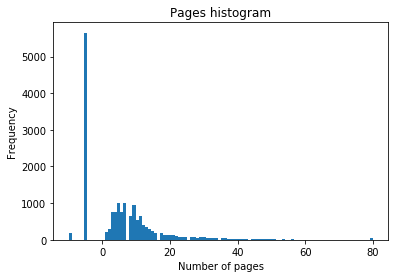

In [6]:
pages = df.pages.values
print(pages)
pages=np.asarray(pages)


pages[pages == 'NaN'] = -5
pages=pages.astype(int)

pages[pages < -10] = -10
pages[pages > 80] = 80
fig = plt.figure()
n, bins, patches = plt.hist(pages,bins=100)
print(np.unique(pages,return_counts=True))

print(bins)
# l = plt.plot(bins)
# fig = pages.plot.hist(y=idx).get_figure()
plt.title("Pages histogram")
plt.xlabel("Number of pages")
plt.ylabel("Frequency")
plt.savefig('pages_hist.eps', format='eps', dpi=1000)
plt.show()

In [7]:
print (df.year.unique())
print (df.year.value_counts())

['NaN' '2004' '2002' '2001' '2000' '2003' '1998' '1999' '-1' '2005' '1993'
 '1994' '1962' '2006' '1997' '1996' '1992' '1986' '1988' '1995' '1991'
 '1985' '2007' '1990' '1989' '1987' '1976' '1978' '1982' '1950' '1961'
 '1979' '1972' '1974' '1973' '1981' '1970' '1965' '1968' '1975' '1983'
 '1984' '1980' '1971' '1957' '1960' '1948' '1977' '1912' '1929' '1952'
 '1969' '1956' '1967' '1949' '2009' '1946' '1936' '1966' '1964' '1941'
 '1958' '2013' '1959' '1935' '2014' '2015' '2010' '1953' '1963' '1943'
 '1951' '1871' '1947' '1954' '2011' '2008' '1944' '1955' '2016' '1899'
 '20060100' '1896' '3' '0' '1940' '1893' '2012']
2007        1562
2005        1542
2008        1523
2006        1505
2009        1341
2004        1315
2003        1039
2002         927
2001         803
2010         701
2000         691
-1           634
1999         539
1998         450
1997         321
1996         283
1995         228
1994         193
1993         153
1992         127
1991         111
1990         108
1989 

[ 1850.    1851.75  1853.5   1855.25  1857.    1858.75  1860.5   1862.25
  1864.    1865.75  1867.5   1869.25  1871.    1872.75  1874.5   1876.25
  1878.    1879.75  1881.5   1883.25  1885.    1886.75  1888.5   1890.25
  1892.    1893.75  1895.5   1897.25  1899.    1900.75  1902.5   1904.25
  1906.    1907.75  1909.5   1911.25  1913.    1914.75  1916.5   1918.25
  1920.    1921.75  1923.5   1925.25  1927.    1928.75  1930.5   1932.25
  1934.    1935.75  1937.5   1939.25  1941.    1942.75  1944.5   1946.25
  1948.    1949.75  1951.5   1953.25  1955.    1956.75  1958.5   1960.25
  1962.    1963.75  1965.5   1967.25  1969.    1970.75  1972.5   1974.25
  1976.    1977.75  1979.5   1981.25  1983.    1984.75  1986.5   1988.25
  1990.    1991.75  1993.5   1995.25  1997.    1998.75  2000.5   2002.25
  2004.    2005.75  2007.5   2009.25  2011.    2012.75  2014.5   2016.25
  2018.    2019.75  2021.5   2023.25  2025.  ]


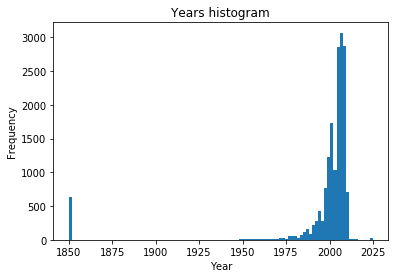

In [10]:
year = df.year.values
year=np.asarray(year)
year[year == 'NaN'] = 2025
# counts_nan = np.count_nonzero(np.isnan(year.astype(float)))
# print(counts_nan)
year=year.astype(int)
year[year < 1850] = 1850
year[(year > 2017) & (year != 2025)] = 2020
fig = plt.figure()
n, bins, patches = plt.hist(year,bins=100)
print(bins)
# l = plt.plot(bins)

# fig = pages.plot.hist(y=idx).get_figure()
plt.title("Years histogram")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.savefig('year_hist.eps', format='eps', dpi=1000)
plt.show()

In [18]:
ye2 = df.year.values
print(ye2)
ye2=np.asarray(ye2)
ye2[ye2 == 'NaN'] = -10
print(len(ye2[ye2 == -10]))

[-10 '2004' '2002' ..., '2011' '2010' '2011']
20


In [6]:
print (df.type.value_counts())

article          12202
inproceedings     2088
book              1490
misc               396
electronic         207
proceedings        169
techreport         160
incollection       124
inbook              54
unpublished         36
phdthesis           25
NaN                 20
mastersthesis        7
manual               2
booklet              1
Name: type, dtype: int64


In [5]:
print(df_dummy.shape)
df_dummy.dropna(inplace=True)
print(df_dummy.shape)
print (df_dummy.apply(pd.Series.nunique))

(16981, 19)
(16981, 19)
citeulike_id          16962
pages                   263
year                     88
type_NaN                  2
type_article              2
type_book                 2
type_booklet              2
type_electronic           2
type_inbook               2
type_incollection         2
type_inproceedings        2
type_manual               2
type_mastersthesis        2
type_misc                 2
type_phdthesis            2
type_proceedings          2
type_techreport           2
type_unpublished          2
type_nan                  1
dtype: int64


In [4]:
# min-max normalization:
from sklearn import preprocessing

# x = df.loc[:,todummy_list].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df.loc[:,todummy_list] = pandas.DataFrame(x_scaled)

values = df.values
imputer = preprocessing.Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(transformed_values)
transformed_df= pd.DataFrame(x_scaled)

0


In [5]:
print(transformed_df.shape)
print(x_scaled.shape)
# print(transformed_df.nunique())
# print (transformed_df.head(2))

(25976, 1893)
(25976, 1893)


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# training= np.random.randint(2, size=(x_scaled.shape[0],x_scaled.shape[1]+1))
# training[:,:-1] = x_scaled

y= np.random.randint(2, size=(x_scaled.shape[1]))
# y= y.reshape((y.shape[0],1))
print(x_scaled.shape)
print(y.shape)

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, np.transpose(np.matrix(x_scaled)), np.transpose(y), cv=kfold, scoring='accuracy')
print(result.mean())

(25976, 1893)
(1893,)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.491811938722


In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import os
from gensim import corpora
import gensim

Using TensorFlow backend.


2017-10-01 22:49:37,599 : INFO : 'pattern' package not found; tag filters are not available for English


In [6]:
fname ='/home/wanli/data/word_embeddings.txt'
model = gensim.models.KeyedVectors.load_word2vec_format(fname, binary=False)

2017-10-01 22:52:16,103 : INFO : loading projection weights from /home/wanli/data/word_embeddings.txt


2017-10-01 22:52:59,142 : INFO : loaded (302775, 200) matrix from /home/wanli/data/word_embeddings.txt


In [7]:
model.wv.similarity('information', 'system')

-0.003150100318443387

In [22]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('sanchez', 0.5267158150672913),
 ('kelleher', 0.5113817453384399),
 ('wrath', 0.5070061683654785),
 ('yoatl', 0.47525104880332947),
 ('girl', 0.4729466438293457),
 ('tollu', 0.47179219126701355),
 ('lich', 0.4713619351387024),
 ('businessman', 0.47063136100769043),
 ('mansion', 0.47035470604896545),
 ('ruth', 0.4694134294986725)]

In [27]:
model.wv.most_similar_cosmul(positive=['computer', 'code'], negative=['biology'])

[('program', 0.9820653200149536),
 ('compiler', 0.9291761517524719),
 ('instructions', 0.9030072689056396),
 ('binaries', 0.9001923203468323),
 ('c/c++', 0.8978627324104309),
 ('applet', 0.8968085050582886),
 ('firmware', 0.891533374786377),
 ('eprom', 0.8878062963485718),
 ('debugger', 0.8845652341842651),
 ('pc', 0.8814089894294739)]

In [35]:
model.wv.most_similar(positive=['recommender'])

[('recommendation', 0.8478092551231384),
 ('recommenders', 0.636306643486023),
 ('personalization', 0.596664309501648),
 ('tagir', 0.5812981724739075),
 ('question-answering', 0.5709900856018066),
 ('e-learning', 0.5520929098129272),
 ('collaborative-filtering', 0.5501213073730469),
 ('tagging', 0.5483794808387756),
 ('personalized', 0.546078085899353),
 ('cbir', 0.5428563952445984)]